<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/FSR/blob/master/IDDLO-29-20/Notebooks/Linear_Regression.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Linear Regression

## imports

In [ ]:
import sys
import sklearn
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import urllib.request
from sklearn import preprocessing
from sklearn import pipeline

In [ ]:
import urllib.request
data_path = os.path.join("datasets", "")
download_path = "https://raw.githubusercontent.com/AbdelMahm/FSR/master/IDDLO-29-20/Notebooks/datasets/"
os.makedirs(data_path, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = download_path + filename
    urllib.request.urlretrieve(url, data_path + filename)

In [ ]:
oecd_bli = pd.read_csv(data_path + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(data_path + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [ ]:
#take a look to the first file
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


## Preprocessing

In [ ]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [ ]:
#take a look to the first file
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [ ]:
# Preprocessing of the data  (iterested with column "2015" which is the "GDP per capita")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [ ]:
#merge data
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)

data = full_country_stats[["GDP per capita", 'Life satisfaction']]


## Linear Regression Model

In [ ]:
data.head()

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9


### Select some features

In [ ]:
#select the features you are interested in
X = np.c_[data["GDP per capita"]]
y = np.c_[data["Life satisfaction"]]
np.shape(X)

(36, 1)

### Visualization

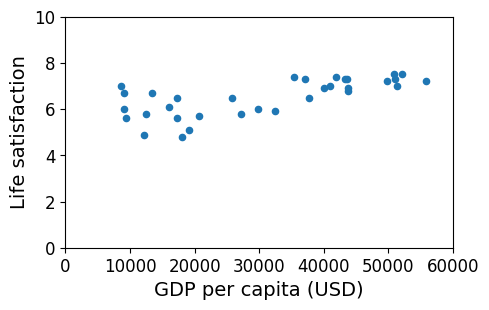

In [ ]:
# Visualize the sample data
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

plt.xlabel("GDP per capita (USD)")

plt.show()
#

### Training

In [ ]:
lrModel = sklearn.linear_model.LinearRegression()

# Train the model
lrModel.fit(X, y)

#model parameters
w0, w1 = lrModel.intercept_[0], lrModel.coef_[0][0]

#R2 (when R2=1, all data is fit -> the Loss(w)=0)
print(lrModel.score(X, y))

0.40410998750014104


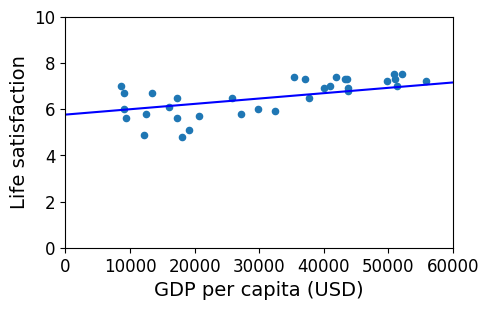

In [ ]:
#plot
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
x=np.linspace(0, 60000, 1000)
plt.plot(x, w0 + w1*x, "b")

#save_fig('best_fit_model_plot')
plt.show()

### Prediction

In [ ]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(lrModel.predict(X_new)) # outputs [[ 5.96242338]]
# on peut faire ceci: print(w1*22587+w0)

[[6.28653637]]


## Add polynomial features

In [ ]:
poly = preprocessing.PolynomialFeatures(degree=5, include_bias=False)
scaler = preprocessing.StandardScaler()

pipelineLRModel = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lrModel)])
np.shape(X)
np.shape(y)
pipelineLRModel.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scal', StandardScaler()), ('lin', LinearRegression())])

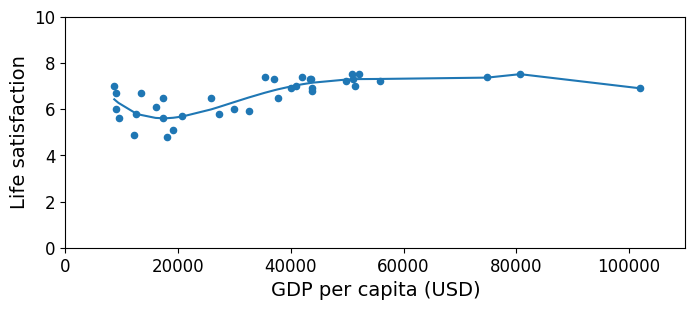

In [ ]:
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

curve = pipelineLRModel.predict(X)
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
plt.show()


In [ ]:
#R2
print(pipelineLRModel.score(X, y))

0.680665301407811


### Regularization (Ridge)

In [ ]:
lrModelRidge = sklearn.linear_model.Ridge(alpha=10**9.5) # alpha == lambda notation in the course
Xsample = np.c_[data["GDP per capita"]]
ysample = np.c_[data["Life satisfaction"]]
lrModelRidge.fit(Xsample, ysample)
w0ridge, w1ridge = lrModelRidge.intercept_[0], lrModelRidge.coef_[0][0]

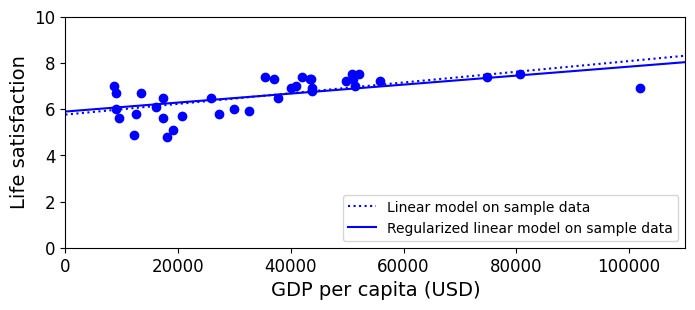

In [ ]:
f = plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(data["GDP per capita"]), list(data["Life satisfaction"]), "bo")

x = np.linspace(0, 110000, 1000)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0ridge + w1ridge * x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")

plt.show()

In [ ]:
#R2
print(lrModelRidge.score(X, y))

0.3935413324399838


## Exercise

### 1- try LASSO regularization
### 2- try on different data
### 3- try with more features
### 4- tune the regularization hyper-parameter alpha (lambda in the course)